In [66]:
# распаковываем файл и знакомимся с данными; tr - table random

import pandas as pd
import numpy as np

table = pd.read_csv(r'C:\Users\Alex\Documents\Саша\Обучение\PythonLibs\Course project\train.csv', encoding='utf-8')

tr = table.sample(20)
tr
table.info()

table['Healthcare_1'].unique().size
table['LifeSquare'].unique().size

# Мы видим, что два параметра имеют пустые значения, причём их очень много. Возможно, проанализировав данные, мы сможем найти корреляцию данных признаков и на основании её заполнить пропщенные значения

table.describe()

# Сразу заметно, что есть странные несоответствия, например, максимальная жилая площадь 7480, при макс общей площади - 641. Также присутствуют неправильные возрасты домов. Нужно отловить все эти ошибки и присваивать им какой-то спец параметр или значение

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [67]:
# Присвоим доп колонки для признаков, имеющих пустое значение, чтобы впоследствии нам стало легко их отделять от основной выборки

table['LifeSquare_nan'] = 0
table['Healthcare_1_nan'] = 0
table.loc[table['LifeSquare'].isna(), 'LifeSquare_nan'] = 1
table.loc[table['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1

table.isna().sum()

# Также выясним какие параметры у нас являются уникальными редко - из них можно вычислить моду. 

unique_values = []
for i in table.columns:
    unique_values.append(table[i].unique().size)
        
unique_values = np.asarray(unique_values)
unique_values.resize(1, 22)

unique_values = pd.DataFrame(unique_values, columns=table.columns)
unique_values

# Например, мы узнали, что чаще всего выбирают 17-ти этажные дома

table['HouseFloor'].mode()

unique_values

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
0,10000,205,9,10000,7888,58,33,44,97,129,...,51,142,30,80,7,16,2,10000,2,2


In [68]:
# Проанализируем целевой параметр Цену. Выше мы уже посмотрели разные показатали. Можно ещё высчитать квантили, чтобы посмотреть, есть ли слишком маленькие или слишком большие стоимости


def min_value(column):
    return np.quantile(table[column], q=0.025)
                                   
def max_value(column):
    return np.quantile(table[column], q=0.975)                                

def min_values(column):
    return table.loc[table[column] < min_value(column)].sort_values(by=column).head(20)

def max_values(column):
    return table.loc[table[column] > max_value(column)].sort_values(by=column).tail(20)

min_values('Price')
max_values('Price')

# Видно, что жестких выбросов по цене нет. Это радует

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
32,3876,100,4.0,104.769022,79.316650,8.0,4,8.0,1960,0.200147,...,23,3975,8,770.0,2,0,B,600903.828562,0,0
4216,12251,26,3.0,116.052846,56.051303,14.0,7,30.0,2013,0.000000,...,36,6714,2,2672.0,0,2,B,601914.014560,0,0
5997,15749,66,3.0,78.747853,33.885760,11.0,2,5.0,1955,0.161976,...,31,7010,5,4508.0,3,7,B,606958.937510,0,0
940,4971,169,5.0,117.855969,76.561318,9.0,12,14.0,2001,0.178917,...,18,3594,4,192.0,1,5,B,608674.130507,0,0
2754,6808,146,3.0,106.867638,64.341756,14.0,4,22.0,2011,0.236108,...,16,3893,27,NaN,3,10,B,610557.405615,0,1
6829,13630,24,3.0,127.141143,4.811405,1.0,3,1.0,2017,0.111627,...,50,12238,8,1970.0,2,3,B,611250.912034,0,0
9006,9840,108,3.0,78.824038,53.016323,8.0,2,8.0,1958,0.000000,...,23,3684,2,NaN,0,4,B,611542.063430,0,1
4897,13532,146,3.0,106.246398,64.451747,14.0,9,18.0,2010,0.236108,...,16,3893,27,NaN,3,10,B,616857.135464,0,1
8339,1225,157,3.0,76.460332,49.979154,8.0,9,8.0,1960,0.000000,...,30,7538,87,4702.0,5,5,B,617749.118586,0,0
4378,8479,32,4.0,115.734780,70.238395,10.0,6,24.0,2006,0.135650,...,46,7960,6,350.0,3,11,B,620399.280325,0,0


In [69]:
# Пройдёмся по каждому признаку в отдельности

# Признак ID: уникальный и он не влияет ни на один параметр, поэтому его нужно убрать из ДатаСета

table = table.drop('Id', axis=1)

# Признак DistrictId: Ранее мы видели, что уникальных значений DistrictId всего 205, соответсвенно данные можно сгруппировать по этому признаку. Оставим пока как есть

In [70]:
# Признак Rooms: уникальных значений всего 9, но почему-то данные имеют дробную часть, чего логически не должно быть. Изменим типа на int

table['Rooms'] = table['Rooms'].astype(np.int32)
table['Rooms'].dtype

# Очень странными выглядит комната со значением 0 или меньше 1. Посмотрим такие квартиры

table.loc[table['Rooms'] < 1]

# Честно говоря, не ясно, что означает 0 комнат. Хотя некая логика может присутствовать, потому что у всех помещений кроме одного, нет кухни; а половина из них принадлежит 0 этажу. Возможно, это какие-то подсобные помещения. Пока оставим как есть


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
2194,88,0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,...,43,8429,3,NaN,3,9,B,158998.110646,0,1
3780,27,0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,...,9,1892,0,NaN,0,1,B,98129.976788,1,1
5894,28,0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,...,30,6207,1,1183.0,1,0,B,217009.338463,1,0
6401,27,0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,...,9,1892,0,NaN,0,1,B,219281.918007,0,1
7644,27,0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,...,9,1892,0,NaN,0,1,B,302211.260887,0,1
7929,6,0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,...,5,1564,0,540.0,0,0,B,212864.799112,1,0
9767,27,0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,...,11,3097,0,NaN,0,0,B,268394.744389,0,1
9869,27,0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,...,2,469,0,NaN,0,0,B,126596.941798,0,1


In [71]:
# Признак Square: все данные имеют цифры после запятой, но дробные части от квадратного метра, нам только мешают, поэтому мы округлим все данные и присвоим тип int
# Также, при максимальных

table['Square'] = round(table['Square'])
table['Square'] = table['Square'].astype(np.int32)

# Проанализируем выбросы

min_values('Square')

# Последние три квартиры выглядят неадекватно: чрезмерно большие квадраты, несоответствующие стоимости и несоответствия по габаритам, например, сумма жилой площади и площади кухни привышают общую.


max_values('Square')

# В минимальных значениях странностей больше. Много значений, где площадь слишком маленькая.

# Получилось слишком много значений, где общая площадь меньше суммы жилой площади и кухни. Можно их как раз пересчитать, как сумму.

# Я бы вообще удалил все квантили, но так как необходимо сделать предикт на всех 5000 тестовых данных, заменим квантили на сумму жилой площади и площади кухни

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
6030,23,1,163,161.155275,1.0,4,3.0,1977,0.014073,B,...,2,475,0,NaN,0,0,B,228572.520347,0,1
5764,54,1,168,125.486563,30.0,18,28.0,2011,0.006076,B,...,30,5285,0,645.0,6,6,B,367353.574566,0,0
5844,93,3,168,NaN,1.0,1,1.0,1977,0.004949,B,...,0,186,0,NaN,0,0,B,211180.794219,1,1
4444,93,3,169,NaN,1.0,2,10.0,1977,0.004949,B,...,0,186,0,NaN,0,0,B,190949.293998,1,1
1449,93,3,169,NaN,1.0,5,3.0,1977,0.004949,B,...,0,186,0,NaN,0,0,B,211325.577641,1,1
8044,93,2,170,NaN,1.0,3,2.0,1977,0.004949,B,...,0,186,0,NaN,0,0,B,194582.912756,1,1
5258,17,4,170,NaN,0.0,12,0.0,1977,0.093443,B,...,23,4635,5,3300.0,2,4,B,531049.721966,1,0
8872,30,3,170,170.713651,1.0,2,2.0,2018,0.000078,B,...,22,6398,141,1046.0,3,23,B,200800.673767,0,0
5283,151,1,175,174.837082,15.0,10,12.0,1958,0.236108,B,...,16,3893,27,NaN,3,10,B,232766.187698,0,1
403,13,5,183,100.985505,15.0,2,6.0,1997,0.090799,B,...,74,19083,2,NaN,5,15,B,622888.825328,0,1


In [72]:
# Признак LifeSquare: также как и прошлый признак, округлим. 

for i, j in enumerate(table['LifeSquare']):
    if np.isnan(j) == False:
        table.loc[i, 'LifeSquare'] = round(table.loc[i, 'LifeSquare'])
    else:
        continue
        

# Посмотрим выбросы на данных, где нет пустых значений
table_no_lf_nan = table.loc[table['LifeSquare_nan'] == 0, 'LifeSquare']


lfsquare_min_value = np.quantile(table_no_lf_nan, q=0.025)
lfsquare_max_value = np.quantile(table_no_lf_nan, q=0.975)
table.loc[table['LifeSquare'] < lfsquare_min_value].sort_values(by='LifeSquare').head(20)
table.loc[table['LifeSquare'] > lfsquare_max_value].sort_values(by='LifeSquare').tail(20)


# Много значений, где жилая площадь равна 0 или 1, а также много значений, где жилая площадь больше общей

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
5631,113,3,125,127.0,19.0,26,24.0,2017,0.050756,B,...,24,5469,1,145.0,0,1,B,522197.035995,0,0
9767,27,0,138,136.0,0.0,4,3.0,2016,0.075424,B,...,11,3097,0,NaN,0,0,B,268394.744389,0,1
8055,62,3,138,137.0,15.0,4,3.0,1977,0.072158,B,...,2,629,1,NaN,0,0,A,295412.633601,0,1
1614,58,3,139,138.0,43.0,2,2.0,1977,0.437885,B,...,23,5735,3,1084.0,0,5,B,169528.896664,0,0
6209,23,3,135,139.0,0.0,2,0.0,1977,0.014073,B,...,2,475,0,NaN,0,0,B,166687.735824,0,1
730,62,3,157,154.0,1.0,1,3.0,2005,0.072158,B,...,2,629,1,NaN,0,0,A,502523.573863,0,1
6030,23,1,163,161.0,1.0,4,3.0,1977,0.014073,B,...,2,475,0,NaN,0,0,B,228572.520347,0,1
3204,23,3,163,162.0,12.0,5,3.0,1977,0.014073,B,...,2,475,0,NaN,0,0,B,207007.956663,0,1
5712,27,1,33,164.0,6.0,3,5.0,1965,0.211401,B,...,9,1892,0,NaN,0,1,B,104891.073757,0,1
6450,30,3,163,165.0,0.0,2,3.0,1977,0.000078,B,...,22,6398,141,1046.0,3,23,B,207407.352593,0,0


In [73]:
# Рассмотрим признак KitchenSquare
min_values('KitchenSquare')
max_values('KitchenSquare')


table.loc[table['KitchenSquare'] == 0]
table.loc[table['KitchenSquare'] == 1]
table.loc[table['KitchenSquare'] == 2]
table.loc[table['KitchenSquare'] == 3]
table.loc[table['KitchenSquare'] == 4]

#Честно говоря, данный признак хочется выкинуть, потому что значений равным единицы слишком много. Что это значит - гадать совсем не хочется, поэтому мы удалим признак позже


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
182,101,2,44,34.0,4.0,2,5.0,1963,0.225825,A,...,41,6558,7,1548.0,3,2,B,180026.274721,0,0
765,30,1,62,53.0,4.0,31,44.0,2009,0.000078,B,...,22,6398,141,1046.0,3,23,B,117647.461002,0,0
833,8,2,45,31.0,4.0,9,9.0,1973,0.458174,B,...,26,4439,1,1130.0,1,5,B,204126.847689,0,0
1020,157,1,28,18.0,4.0,4,5.0,1932,0.000000,B,...,30,7538,87,4702.0,5,5,B,201311.771818,0,0
1110,108,1,31,19.0,4.0,3,8.0,1959,0.000000,B,...,25,5027,4,46.0,1,1,B,181626.175103,0,0
1463,116,1,35,19.0,4.0,5,9.0,1965,0.341072,B,...,27,5664,48,2300.0,3,11,B,198412.424593,0,0
1572,104,1,36,20.0,4.0,6,5.0,1917,0.000078,B,...,22,6398,141,1046.0,3,23,B,236830.764637,0,0
1927,4,1,29,18.0,4.0,1,8.0,1963,0.327018,B,...,12,2270,23,2500.0,1,0,B,168150.110362,0,0
1974,7,2,44,29.0,4.0,6,5.0,1964,0.130618,B,...,39,10418,9,900.0,1,9,B,180923.169520,0,0
2093,190,2,47,36.0,4.0,5,5.0,1918,0.000000,B,...,30,7538,87,4702.0,5,5,B,537979.657509,0,0


In [74]:
# Приведем теперь в порядок признак Square

for i, j in enumerate(table['LifeSquare']):
    if (table.loc[i, 'LifeSquare'] > table.loc[i, 'Square']) & (np.isnan(j) == False):
        table.loc[i, 'Square'] = table.loc[i, 'LifeSquare'] + table.loc[i, 'KitchenSquare']
    else:
        continue

# Теперь заменим значения NaN в колонке LifeSquare

for i, j in enumerate(table['LifeSquare']):
    if (np.isnan(j) == True):
        table.loc[i, 'LifeSquare'] = table.loc[i, 'Square'] - table.loc[i, 'KitchenSquare']
    else:
        continue


In [75]:
# Посмотрим значения Square и LifeSquare ещё раз

table.sort_values(by='LifeSquare').tail(20)
table.sort_values(by='LifeSquare').head(20)
table.sort_values(by='Square').tail(20)
table.sort_values(by='Square').head(20)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
9869,27,0,2.0,1.0,0.0,1,0.0,1977,0.017647,B,...,2,469,0,NaN,0,0,B,126596.941798,0,1
4496,34,1,4.0,3.0,1.0,21,4.0,1977,0.069753,B,...,53,13670,4,NaN,1,11,B,458378.777006,0,1
4800,38,1,5.0,5.0,1.0,28,1.0,1977,0.060753,B,...,15,2787,2,520.0,0,7,B,483283.488083,0,0
5009,27,1,5.0,2.0,1.0,18,1.0,1977,0.011654,B,...,4,915,0,NaN,0,0,B,107604.269441,0,1
7470,1,1,6.0,5.0,1.0,3,1.0,1977,0.007122,B,...,1,264,0,NaN,0,1,B,181434.825589,0,1
8572,6,1,6.0,5.0,1.0,3,25.0,2014,0.243205,B,...,5,1564,0,540.0,0,0,B,137597.601458,0,0
161,45,1,6.0,5.0,1.0,3,1.0,1977,0.195781,B,...,23,5212,6,NaN,3,2,B,438005.182323,0,1
328,27,3,7.0,6.0,1.0,8,19.0,2016,0.211401,B,...,9,1892,0,NaN,0,1,B,161379.067034,0,1
1401,5,1,7.0,6.0,1.0,1,1.0,1977,0.150818,B,...,16,3433,4,2643.0,4,5,B,369472.403061,0,0
5870,21,1,16.0,9.0,0.0,2,5.0,1965,0.194489,B,...,47,8004,3,125.0,3,5,B,79913.267856,0,0


In [76]:
# Приведем квартиры с площадью меньше 16 кв к среднему значению таким образом

med_Price = table['Price'].median()

table.loc[(table['Square'] < 16), 'Price'] = med_Price
table.loc[(table['Square'] < 16), 'Square'] = table['Square'].median()
table.loc[(table['LifeSquare'] < 16), 'LifeSquare'] = table['LifeSquare'].median()

# Приведем квартиры с площадью больше 227 кв к среднему значению таким же образом

table.loc[(table['Square'] > 227), 'Price'] = med_Price
table.loc[(table['Square'] > 227), 'Square'] = table['Square'].median()
table.loc[(table['LifeSquare'] > 227), 'LifeSquare'] = table['LifeSquare'].median()

# Много значений, где LifeSquare слишком мало. Преобразуем

In [77]:
table.sort_values(by='LifeSquare').tail(20)
table.sort_values(by='LifeSquare').head(50)
table.sort_values(by='Square').tail(20)
table.sort_values(by='Square').head(20)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
5870,21,1,16.0,37.0,0.0,2,5.0,1965,0.194489,B,...,47,8004,3,125.0,3,5,B,79913.267856,0,0
6632,0,1,17.0,37.0,0.0,7,5.0,1961,0.319809,B,...,25,4756,16,2857.0,5,8,B,88871.750230,0,0
3686,57,3,17.0,17.0,8.0,5,5.0,1962,0.133215,B,...,49,11395,3,1406.0,3,4,A,77835.185808,0,0
8501,62,2,17.0,16.0,1.0,4,20.0,1977,0.072158,B,...,2,629,1,NaN,0,0,A,180750.471749,1,1
8330,101,1,19.0,37.0,3.0,5,5.0,1970,0.225825,A,...,41,6558,7,1548.0,3,2,B,115845.861527,0,0
9990,21,1,19.0,37.0,2.0,1,5.0,1967,0.194489,B,...,47,8004,3,125.0,3,5,B,112411.221700,0,0
890,112,1,20.0,37.0,3.0,5,9.0,1974,0.069660,B,...,31,6119,4,NaN,1,2,B,113050.229914,0,1
7209,0,1,20.0,16.0,0.0,2,5.0,1962,0.319809,B,...,25,4756,16,2857.0,5,8,B,102395.788856,0,0
299,90,1,21.0,37.0,3.0,7,5.0,1968,0.265089,B,...,37,5288,0,1937.0,3,2,B,128808.087357,0,0
9631,90,1,21.0,37.0,3.0,4,5.0,1964,0.265089,B,...,37,5288,0,1937.0,3,2,B,113846.123763,0,0


In [78]:
# Удаляем KitchenSquare        

table = table.drop('KitchenSquare', axis=1)

In [79]:
min_values('Floor')
max_values('Floor')

# Неадекватных значений нет, но признак Floor должен быть всегда меньше, либо равен HouseFloor. Так как в HouseFloor присутствуют странные значения, приравняем именно его

for i, j in enumerate(table['HouseFloor']):
    if table.loc[i, 'HouseFloor'] < table.loc[i, 'Floor']:
        table.loc[i, 'HouseFloor'] = table.loc[i, 'Floor']
    else:
        continue
        
table.loc[table['HouseFloor'] < table['Floor']]

,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan


In [80]:
# Рассмотрим показатель HouseFloor 

min_values('HouseFloor')
max_values('HouseFloor')

# После наших преобразований показатель смотрится хорошо. Есть три очень высоких значения, но оставим их

,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_nan,Healthcare_1_nan
1109,54,1,106.0,83.0,26,37.0,2009,0.006076,B,B,30,5285,0,645.0,6,6,B,274139.065875,0,0
1906,86,5,53.0,37.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,192269.644879,0,0
7599,146,1,86.0,72.0,37,38.0,2012,0.236108,B,B,16,3893,27,NaN,3,10,B,269113.584248,0,1
2388,30,1,106.0,87.0,14,39.0,2010,0.000078,B,B,22,6398,141,1046.0,3,23,B,476843.942405,0,0
819,30,2,105.0,86.0,25,39.0,2009,0.000078,B,B,22,6398,141,1046.0,3,23,B,193885.918114,0,0
1038,31,2,81.0,47.0,15,40.0,1977,0.151346,B,A,32,5889,10,830.0,4,1,B,547586.080087,0,0
3125,31,1,81.0,25.0,6,40.0,2014,0.151346,B,A,32,5889,10,830.0,4,1,B,460492.010947,0,0
761,30,1,117.0,102.0,14,40.0,2011,0.000078,B,B,22,6398,141,1046.0,3,23,B,521829.550445,0,0
3803,31,2,82.0,49.0,23,40.0,2013,0.151346,B,A,32,5889,10,830.0,4,1,B,558262.139114,0,0
2632,31,2,106.0,34.0,4,40.0,2013,0.151346,B,A,32,5889,10,830.0,4,1,B,624549.354546,0,0


In [81]:
# Признак HouseYear


min_values('HouseYear')
max_values('HouseYear')

# Присутствуют два странных значения, изменим их:


table.loc[8828, 'HouseYear'] = 2020
table.loc[9163, 'HouseYear'] = 2005

In [82]:
# Остальные признаки

table.loc[table['Social_2'] == 5889].head(50)
table.loc[table['Social_2'] == 3097].head(50)
table.loc[table['Social_2'] == 5285].head(50)
table.loc[table['Social_2'] == 3893].head(50)
table.loc[(table['Social_2'] == 3097) & (table['Healthcare_1'].isna() == False)]
table.loc[(table['Social_2'] == 3893) & (table['Healthcare_1'].isna() == False)]
table.loc[(table['Social_2'] == 264) & (table['Healthcare_1'].isna() == False)]
table.loc[table['Healthcare_1'].isna() == True]

# Заметна интересная зависимость между всеми оставшимися покаателями кроме цены. 

# Так как они сильно привязаны друг к другу, предлагаю удалить HealthCare_1, потому что он имеет пустые значения, которые быстро вычислить будет сложно. А также переведем категориальные признаки в цифровые

def cat_to_num(column):
    for i, j in enumerate(table[column]):
        if table.loc[i, column] == 'A':
            table.loc[i, column] = 0
        else:
            table.loc[i, column] = 1
    return table

cat_to_num('Ecology_2')
cat_to_num('Ecology_3')
cat_to_num('Shops_2')


table = table.drop('Healthcare_1', axis=1)

#Теперь таблица выглядит красиво, удалим наши добавленные колонки LifeSquare_nan и Healthcare_1_nan

table = table.drop('LifeSquare_nan', axis=1)
table = table.drop('Healthcare_1_nan', axis=1)

table


,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,27,3,115.0,105.0,4,10.0,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089
1,22,1,40.0,23.0,7,8.0,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407
2,1,3,78.0,48.0,2,17.0,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850
3,1,1,40.0,39.0,10,22.0,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630
4,94,2,64.0,39.0,16,16.0,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2,49.0,33.0,3,12.0,1981,0.300323,1,1,52,10311,6,1,9,1,119367.455796
9996,27,2,64.0,37.0,13,13.0,1977,0.072158,1,1,2,629,1,0,0,0,199715.148807
9997,178,1,30.0,17.0,3,5.0,1958,0.460556,1,1,20,4386,14,1,5,1,165953.912580
9998,21,1,32.0,22.0,3,9.0,1969,0.194489,1,1,47,8004,3,3,5,1,171842.411855


In [83]:
# Приведем все данные к типу Int

for i, j in enumerate(table['Ecology_1']):
    table.loc[i, 'Ecology_1'] = round(table.loc[i, 'Ecology_1'] * 100)


table = table.astype(np.int)

table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   DistrictId   10000 non-null  int32
 1   Rooms        10000 non-null  int32
 2   Square       10000 non-null  int32
 3   LifeSquare   10000 non-null  int32
 4   Floor        10000 non-null  int32
 5   HouseFloor   10000 non-null  int32
 6   HouseYear    10000 non-null  int32
 7   Ecology_1    10000 non-null  int32
 8   Ecology_2    10000 non-null  int32
 9   Ecology_3    10000 non-null  int32
 10  Social_1     10000 non-null  int32
 11  Social_2     10000 non-null  int32
 12  Social_3     10000 non-null  int32
 13  Helthcare_2  10000 non-null  int32
 14  Shops_1      10000 non-null  int32
 15  Shops_2      10000 non-null  int32
 16  Price        10000 non-null  int32
dtypes: int32(17)
memory usage: 664.2 KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

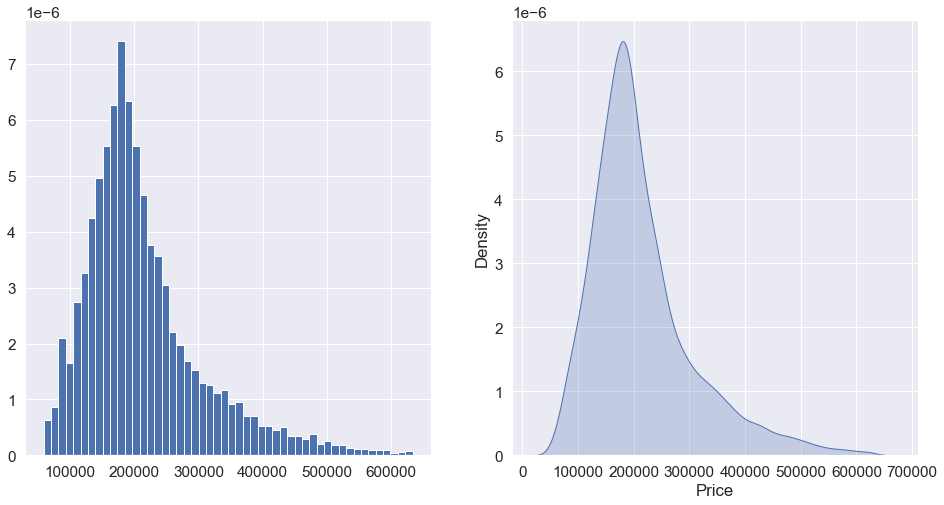

In [84]:
# Теперь перейдем к график

# В первую очередь изучим целевую переменную

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize = (16, 8))

plt.subplot(121)
table['Price'].hist(density=True, bins=50)

plt.subplot(122)
sns.kdeplot(table['Price'], shade=True)

<function matplotlib.pyplot.show(close=None, block=None)>

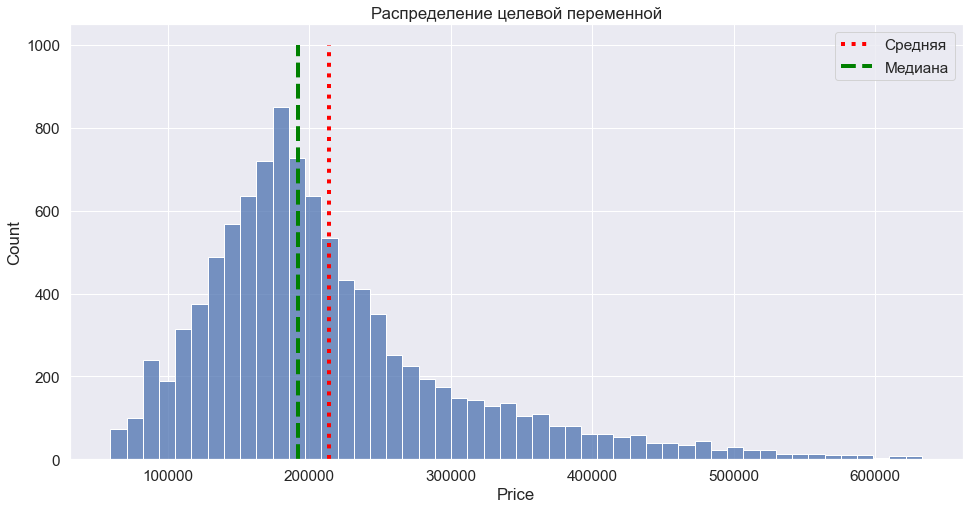

In [85]:
price_mean = round(table['Price'].mean(), 2)
price_median = table['Price'].median()

plt.figure(figsize=(16, 8))
sns.histplot(table['Price'], bins=50)

y = np.linspace(0, 1000, 10)

plt.plot([price_mean] * 10, y, label='Средняя', linewidth=4, linestyle=':', color='red')
plt.plot([price_median] * 10, y, label='Медиана', linewidth=4, linestyle='--', color='green')

plt.title('Распределение целевой переменной')
plt.legend()
plt.show


array([[<AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>],
       [<AxesSubplot:title={'center':'Shops_1'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

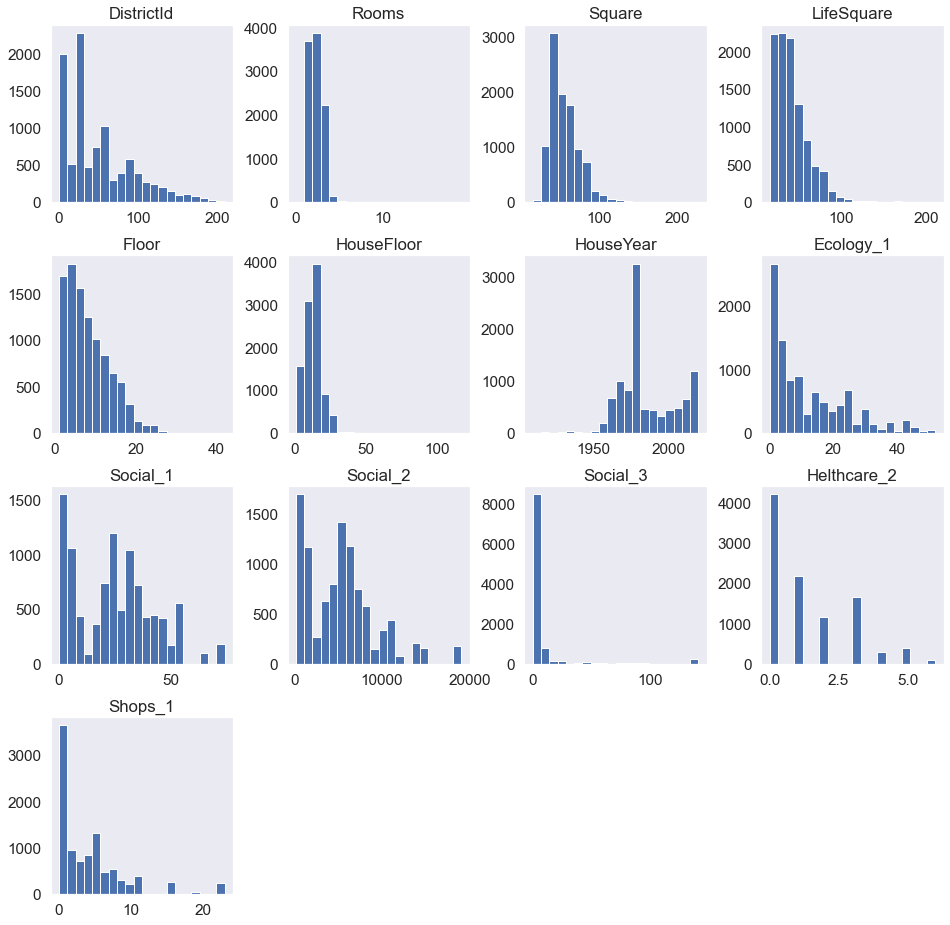

In [86]:
# Проанализируем колчиественные признаки

table_num_features = table.drop(['Ecology_2', 'Ecology_3', 'Shops_2', 'Price'], axis=1)
table_num_features.hist(figsize=(16, 16), bins=20, grid=False)

In [87]:
# В глаза сильно бросается, что четверть домов 1977 года постройки

table.loc[table['HouseYear'] == 1977, 'HouseYear'].size

# А также, что почти треть признака Social_3 равен нулю

table.loc[table['Social_3'] == 0, 'Social_3'].size

2997

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


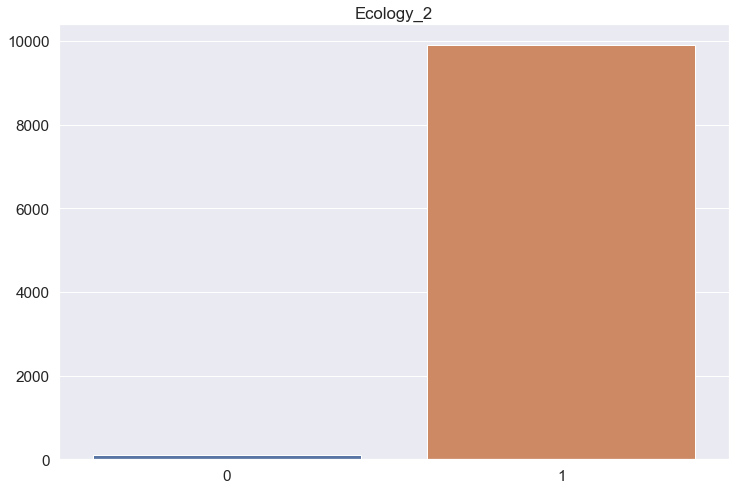

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


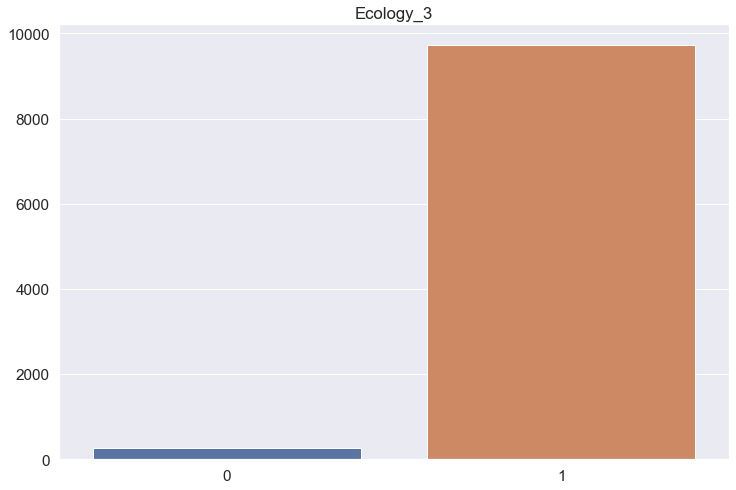

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


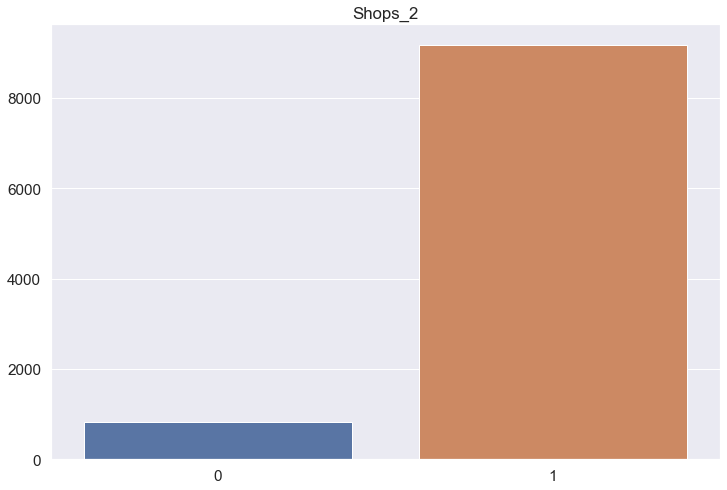

In [88]:
# Посмотрим категориальные признаки

def bars(column):
    counts=table[column].value_counts()
    plt.figure(figsize=(12,8))
    plt.title(column)
    sns.barplot(counts.index, counts.values)
    return plt.show()

bars('Ecology_2')
bars('Ecology_3')
bars('Shops_2')


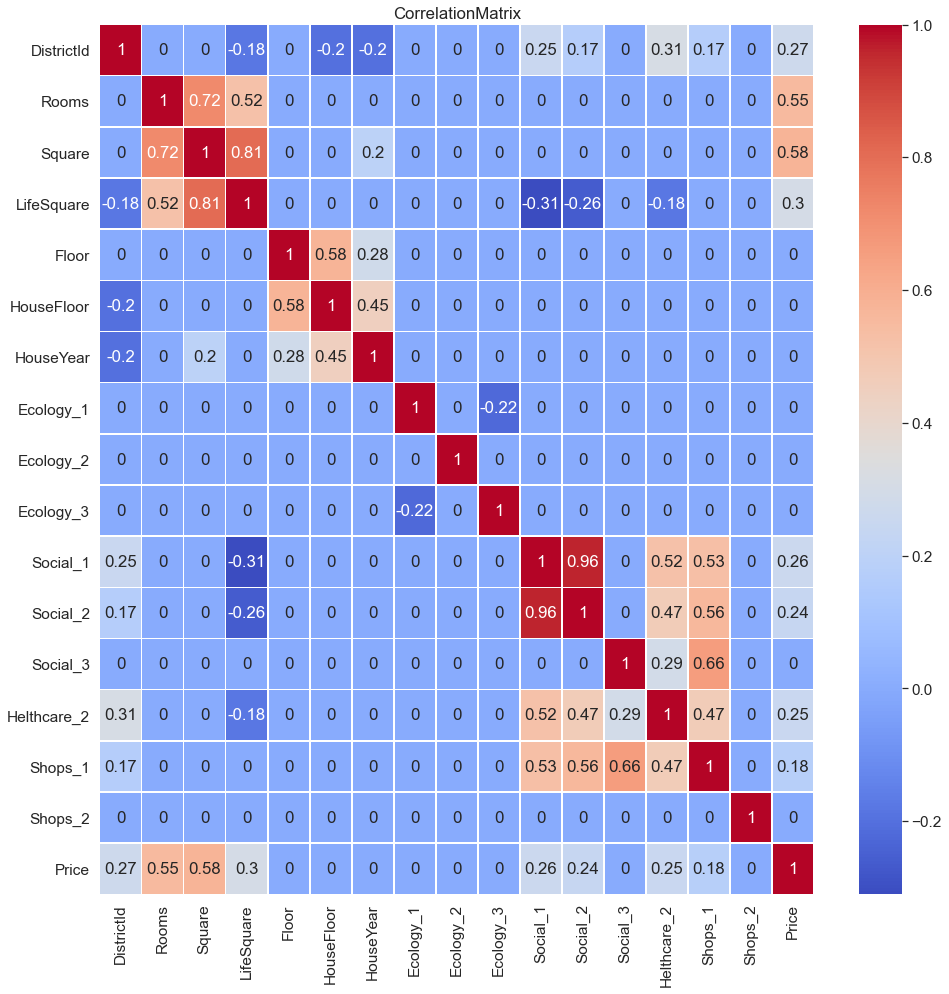

In [89]:
plt.figure(figsize=(16,16))
sns.set(font_scale=1.4)
corr_matrix = table.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.15] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('CorrelationMatrix')
plt.show()

# Честно говоря, очень странно наблюдать тот факт, что большенство прищнаков мало влияют на цену. Хотя, конечно, первое на что люди смотрят это колиество комнат и площадь
# Инетересно, что признаки Social_1 и Social_2 сильнейшим образом созависимы. Чтобы это значило...

In [90]:
# Для того, чтобы начать обучать модели, придётся привести все Тестовые данные также в нужный вид. НАЧНЕМ

tb_test = pd.read_csv(r'C:\Users\Alex\Documents\Саша\Обучение\PythonLibs\Course project\test.csv', encoding='utf-8')

tb_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [91]:
def min_value_test(column):
    return np.quantile(tb_test[column], q=0.025)
                                   
def max_value_test(column):
    return np.quantile(tb_test[column], q=0.975)                                

def min_values_test(column):
    return tb_test.loc[tb_test[column] < min_value_test(column)].sort_values(by=column).head(20)

def max_values_test(column):
    return tb_test.loc[tb_test[column] > max_value_test(column)].sort_values(by=column).tail(20)

tb_test.sort_values(by='Square').head(20)

tb_test = tb_test.drop('Id', axis=1)

tb_test['Square'] = round(tb_test['Square'])
tb_test['Square'] = tb_test['Square'].astype(np.int32)

for i, j in enumerate(tb_test['LifeSquare']):
    if np.isnan(j) == False:
        tb_test.loc[i, 'LifeSquare'] = round(tb_test.loc[i, 'LifeSquare'])
    else:
        continue
        
for i, j in enumerate(tb_test['LifeSquare']):
    if (tb_test.loc[i, 'LifeSquare'] > tb_test.loc[i, 'Square']) & (np.isnan(j) == False):
        tb_test.loc[i, 'Square'] = tb_test.loc[i, 'LifeSquare'] + tb_test.loc[i, 'KitchenSquare']
    else:
        continue
        
for i, j in enumerate(tb_test['LifeSquare']):
    if (np.isnan(j) == True):
        tb_test.loc[i, 'LifeSquare'] = tb_test.loc[i, 'Square'] - tb_test.loc[i, 'KitchenSquare']
    else:
        continue

In [92]:
# Проверим значения

tb_test.sort_values(by='LifeSquare').tail(20)
tb_test.sort_values(by='LifeSquare').head(20)
tb_test.sort_values(by='Square').tail(20)
tb_test.sort_values(by='Square').head(20)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2463,53,1.0,1.0,1.0,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
3608,27,1.0,2.0,2.0,1.0,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
1672,45,1.0,4.0,3.0,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B
2051,6,1.0,5.0,4.0,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
131,30,1.0,5.0,4.0,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
4193,6,1.0,5.0,3.0,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B
996,27,1.0,6.0,2.0,1.0,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
3042,21,1.0,13.0,9.0,0.0,6,5.0,1965,0.194489,B,B,47,8004,3,125.0,3,5,B
2412,66,1.0,16.0,11.0,1.0,4,5.0,1965,0.111627,B,B,50,12238,8,1970.0,2,3,B
4084,29,1.0,17.0,16.0,2.0,3,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B


In [93]:
# Продолжим

tb_test.loc[(tb_test['Square'] < 16), 'Square'] = tb_test['Square'].median()
tb_test.loc[(tb_test['LifeSquare'] < 16), 'LifeSquare'] = tb_test['LifeSquare'].median()

tb_test.loc[(tb_test['Square'] > 227), 'Square'] = tb_test['Square'].median()
tb_test.loc[(tb_test['LifeSquare'] > 227), 'LifeSquare'] = tb_test['LifeSquare'].median()

tb_test = tb_test.drop('KitchenSquare', axis=1)

In [94]:
# Посмотрим значения

tb_test.sort_values(by='LifeSquare').tail(20)
tb_test.sort_values(by='LifeSquare').head(20)
tb_test.sort_values(by='Square').tail(20)
tb_test.sort_values(by='Square').head(20)

,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2412,66,1.0,16.0,37.0,4,5.0,1965,0.111627,B,B,50,12238,8,1970.0,2,3,B
4084,29,1.0,17.0,16.0,3,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4570,101,1.0,18.0,37.0,4,5.0,1967,0.225825,A,B,41,6558,7,1548.0,3,2,B
1509,101,1.0,19.0,37.0,4,5.0,1970,0.225825,A,B,41,6558,7,1548.0,3,2,B
792,84,1.0,19.0,37.0,6,5.0,1965,0.149666,B,B,22,4789,2,4087.0,4,1,B
3356,44,1.0,20.0,37.0,7,9.0,1970,0.122190,B,B,25,4724,2,1308.0,1,3,B
1101,21,1.0,21.0,16.0,11,9.0,1972,0.194489,B,B,47,8004,3,125.0,3,5,B
269,41,1.0,22.0,16.0,9,9.0,1973,0.175055,B,B,36,10055,3,NaN,1,0,B
3856,37,1.0,22.0,37.0,2,5.0,1970,0.127812,B,B,28,7287,5,320.0,1,3,B
3337,66,1.0,22.0,37.0,6,9.0,1973,0.161976,B,A,31,7010,5,4508.0,3,7,B


In [95]:
for i, j in enumerate(tb_test['HouseFloor']):
    if tb_test.loc[i, 'HouseFloor'] < tb_test.loc[i, 'Floor']:
        tb_test.loc[i, 'HouseFloor'] = tb_test.loc[i, 'Floor']
    else:
        continue
        

def cat_to_num_test(column):
    for i, j in enumerate(tb_test[column]):
        if tb_test.loc[i, column] == 'A':
            tb_test.loc[i, column] = 0
        else:
            tb_test.loc[i, column] = 1
    return tb_test

cat_to_num_test('Ecology_2')
cat_to_num_test('Ecology_3')
cat_to_num_test('Shops_2')


tb_test = tb_test.drop('Healthcare_1', axis=1)

In [96]:
# Приведем все данные к типу Int

for i, j in enumerate(tb_test['Ecology_1']):
    tb_test.loc[i, 'Ecology_1'] = round(tb_test.loc[i, 'Ecology_1'] * 100)


tb_test = tb_test.astype(np.int)

tb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   DistrictId   5000 non-null   int32
 1   Rooms        5000 non-null   int32
 2   Square       5000 non-null   int32
 3   LifeSquare   5000 non-null   int32
 4   Floor        5000 non-null   int32
 5   HouseFloor   5000 non-null   int32
 6   HouseYear    5000 non-null   int32
 7   Ecology_1    5000 non-null   int32
 8   Ecology_2    5000 non-null   int32
 9   Ecology_3    5000 non-null   int32
 10  Social_1     5000 non-null   int32
 11  Social_2     5000 non-null   int32
 12  Social_3     5000 non-null   int32
 13  Helthcare_2  5000 non-null   int32
 14  Shops_1      5000 non-null   int32
 15  Shops_2      5000 non-null   int32
dtypes: int32(16)
memory usage: 312.6 KB


array([[<AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>],
       [<AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>],
       [<AxesSubplot:title={'center':'Shops_1'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

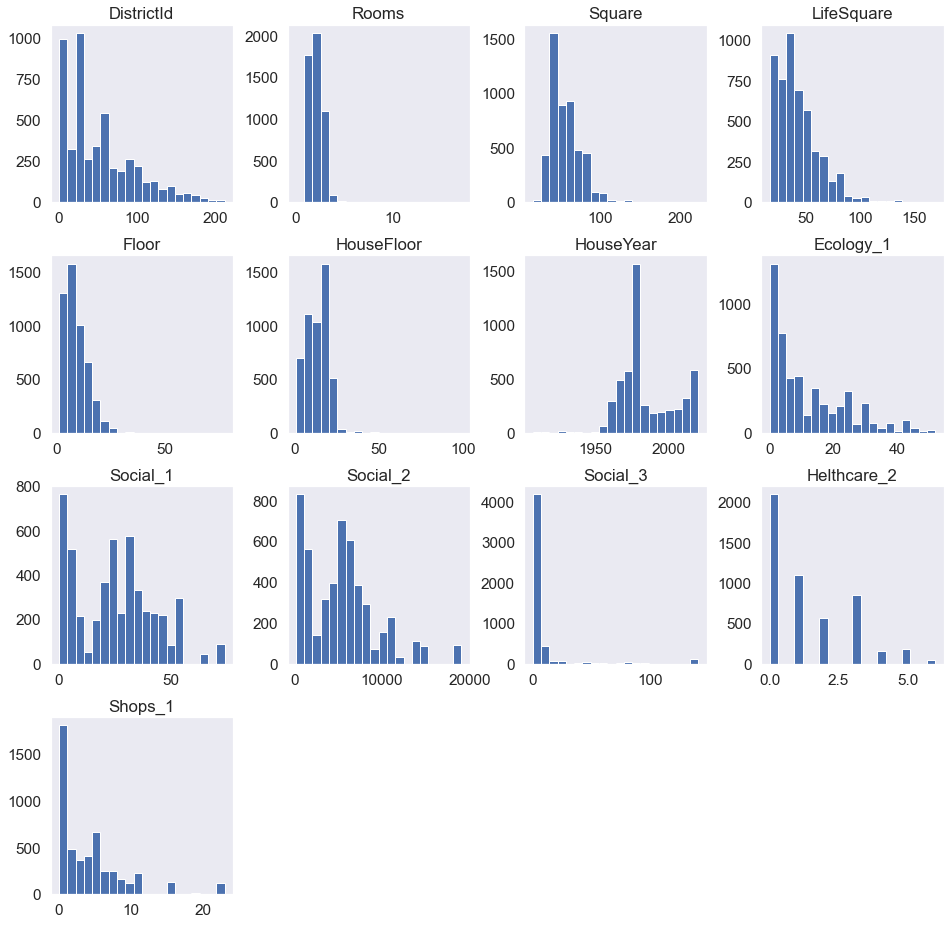

In [97]:
# Для интереса глянем графики

tb_test_num_features = tb_test.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)
tb_test_num_features.hist(figsize=(16, 16), bins=20, grid=False)

In [312]:
# УРААА, переходим к моделям!!! Выделим цену из тренировочной выборки

X = table.drop('Price', axis=1)
y = table['Price']

# Подготовим выборку. Для этого разделим её на тренировочную и вылидационную

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [313]:
y_pred = lr.predict(X_valid)

y_pred

# проверим отклонения

check_test = pd.DataFrame({
    "y_valid": y_valid,
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_valid,y_pred
3309,199944,210305.049505
991,197796,132872.262764
4868,178486,220596.611065
9642,114086,165307.995135
4928,192944,189161.516207
9947,137389,126861.114116
5719,250072,216011.636375
8656,128863,159314.922232
5421,158467,223813.753553
2861,143375,123397.308902


In [ ]:
# Отправим на проверку первую ерсию

tb_test_sub = pd.read_csv(r'C:\Users\Alex\Documents\Саша\Обучение\PythonLibs\Course project\test.csv', encoding='utf-8')

submission = pd.DataFrame({
    'Id': tb_test_sub['Id'].values,
    'Price': y_pred
})

submission.to_csv('LR prediction.csv', index=False)

# Точность предсказания всего 51 %

In [314]:
check_test["error"] = check_test["y_pred"] - check_test["y_valid"]

check_test.head(10)

# очень сильные отклонения!!!

mse1 = (check_test["error"] ** 2).mean()

mse1

4152852273.6024117

In [315]:
feature_names = tb_test.columns

feature_names


Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1',
       'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

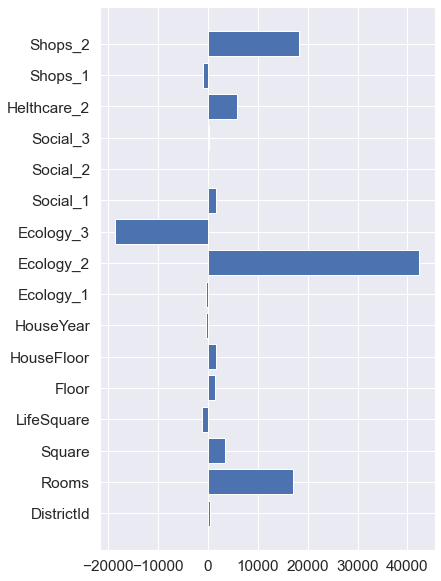

In [316]:
lr.intercept_
lr.coef_

plt.rcParams['figure.figsize'] = 6, 10

plt.barh(feature_names, lr.coef_.flatten())
plt.show()

# Видим, что признаки с наименьшим отклонением, имеют наибольший вес в модели, что не отражает реальную картину. Следует масштабировать все показатели

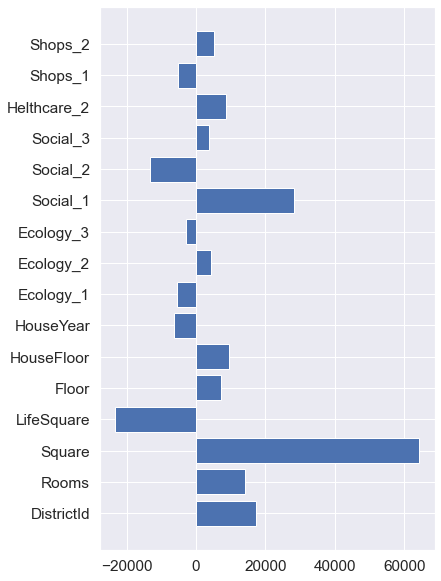

In [317]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_valid_scaled = scaler.fit_transform(X_valid)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=feature_names)

lr_scaled = LinearRegression()

lr_scaled.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr_scaled.coef_.flatten())
plt.show()


In [318]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr_scaled.coef_.flatten())
    if np.abs(weight) > 10000
]

print(important_features)

['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'Social_1', 'Social_2']


In [319]:
from sklearn.metrics import mean_squared_error

lr.fit(
    X_train.loc[:, important_features],
    y_train
)

y_pred = lr.predict(X_valid.loc[:, important_features])

mse2 = mean_squared_error(y_valid, y_pred)

print("mse до: {}".format(mse1))
print("mse после: {}".format(mse2))

# Всё только ухудшилось

mse до: 4152852273.6024117
mse после: 4492123192.3132515


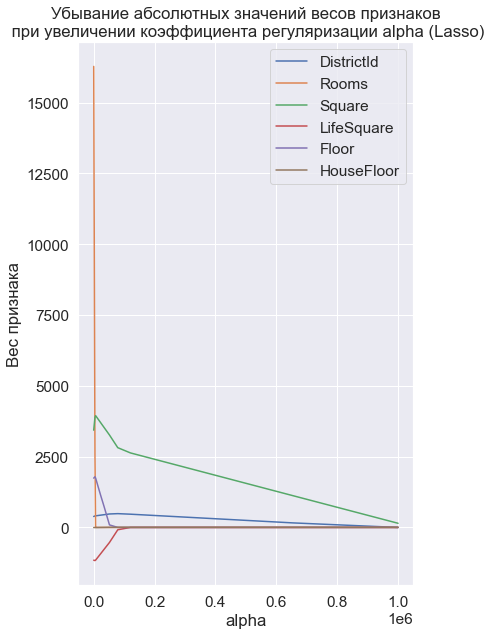

In [320]:
from sklearn.linear_model import Lasso, Ridge

n = 50

coeffs = np.zeros((n, len(important_features)))
alpha_list = np.logspace(-3, 6, n)

for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val)
    lasso.fit(X_train.loc[:, important_features], y_train)
    
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(len(important_features)):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')

plt.xlabel('alpha')
plt.ylabel('Вес признака')

plt.legend(feature_names)

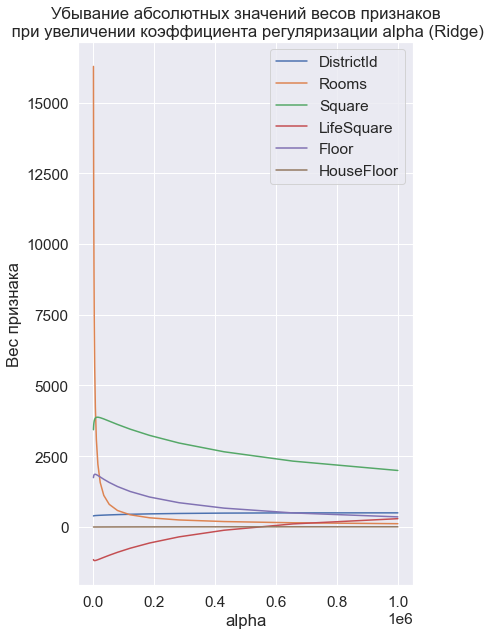

In [321]:
n = 50

coeffs = np.zeros((n, len(important_features)))
alpha_list = np.logspace(-3, 6, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val)
    ridge.fit(X_train.loc[:, important_features], y_train)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(len(important_features)):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')

plt.xlabel('alpha')
plt.ylabel('Вес признака')

plt.legend(feature_names)

In [327]:
# Модель случайного леса

max_depth_values = np.arange(2, 7)
accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value)
    
    clf.fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_valid_scaled)
    y_pred_train = clf.predict(X_train_scaled)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    print('K = {}'.format(value))
    print('\tacc_valid = {}'.format(acc_valid))
    print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

K = 2
	acc_valid = 0.0012
	acc_train = 0.002

K = 3
	acc_valid = 0.0012
	acc_train = 0.0028

K = 4
	acc_valid = 0.0012
	acc_train = 0.0038666666666666667

K = 5
	acc_valid = 0.0012
	acc_train = 0.0054666666666666665

K = 6
	acc_valid = 0.0012
	acc_train = 0.007333333333333333

